In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
m_x=np.loadtxt('mnist_x',delimiter=' ')

In [4]:
m_y=np.loadtxt('mnist_y')

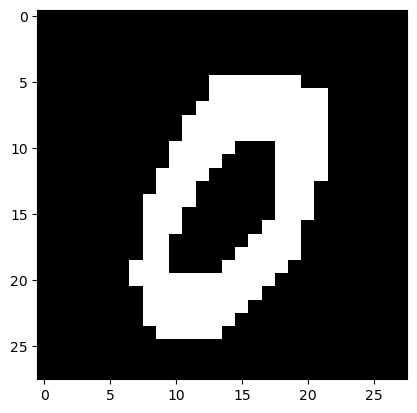

In [6]:
data=np.reshape(np.array(m_x[0],int),[28,28])
# 创建一个图形床口用来配置属性
plt.figure()
plt.imshow(data,cmap='gray')
ratio=0.8
split=int(len(m_x)*ratio)
# print(split)
np.random.seed(0)
# 对数据随机排列
idx=np.random.permutation(np.arange(len(m_x)))
m_x=m_x[idx]
m_y=m_y[idx]
# print(m_x)
x_train,x_test=m_x[:split],m_x[split:]
y_train,y_test=m_y[:split],m_y[split:]

In [86]:
def distance(a,b):
    # a,b 间直线距离 
    return np.sqrt(np.sum(np.square(a-b)))
class KNN:
    def __init__(self,k,label_num):
        self.k=k
        self.label_num=label_num
    def fit(self,x_train,y_train):
        # 在类中保存训练数据
        self.x_train=x_train
        self.y_train=y_train
    def get_knn_indices(self,x):
        # 获取距离目标样本点最近的k个样本点的标签
        # 计算已知样本的距离
        # 确定 x_train 和 x 距离
        dis=list(map(lambda a:distance(a,x),self.x_train))
        print(dis)
        #按照距离排序，并得到对应下标
        knn_indices=np.argsort(dis)
        #去最近k个
        knn_indices=knn_indices[:self.k]
        return knn_indices
    def get_label(self,x):
        '''
        x：待分类样本
        获取分类样本周边的已分类样本
        label 中记录周围样本类别
        label_statistic[label]+=1 对不同类别进行技术
        然后返回类别最多的下标索引
        '''
        knn_indices=self.get_knn_indices(x)
        label_statistic=np.zeros(shape=[self.label_num])
        for i in knn_indices:
            # 获取训练样例的标签
            label=int(self.y_train[i])
            # 对这种标签进行计数，即统计某个分类的数量
            label_statistic[label]+=1
        # 返回数量最多的类别
        return np.argmax(label_statistic)
    def predict(self,x_text):
        predicted_test_labels = np.zeros(shape = [len(x_test)],dtype=int)
        for i ,x in enumerate(x_test):
            # 便利测试样本，获取类别
            predicted_test_labels[i] =self.get_label(x)
        return predicted_test_labels
for k in range(1,10):
    knn=KNN(k,10)
    knn.fit(x_train,y_train)
    predicted_labels =knn.predict(x_test)
    accuracy=np.mean(predicted_labels==y_test)
    print(f'K: {k},预测准确率为{accuracy*100:.1f}%')
# 整体流程 通过判断测试集中每个数据在k个已训练样本的范围内的分类情况，确定 测试集每个测试样本的类类别
# 分类过程中，首先初始化 已训练的样本和他们的标签集
# 找出测试集中每个需要分类的周边的k个样本
# 确定k样本中类别最大值的索引，便利所有测试集，完成处理

K: 1,预测准确率为85.5%
K: 2,预测准确率为86.0%
K: 3,预测准确率为85.5%
K: 4,预测准确率为85.5%
K: 5,预测准确率为86.0%
K: 6,预测准确率为84.5%
K: 7,预测准确率为85.0%
K: 8,预测准确率为84.0%
K: 9,预测准确率为84.5%


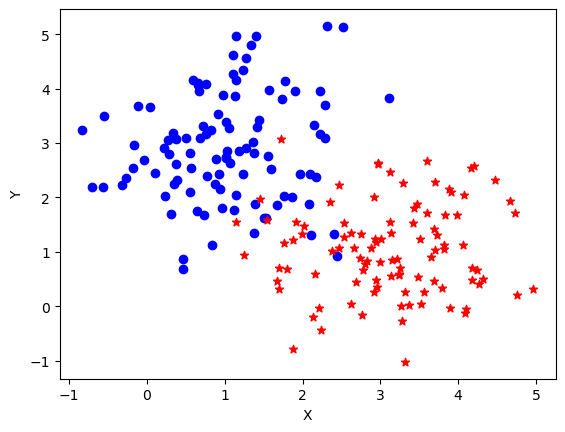

In [16]:
from sklearn.neighbors  import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('gauss.csv',delimiter=',')
# 取前两列
x_train=data[:,:2]
# 取最后一列
y_train=data[:,2]
# print(x_train,y_train)
plt.figure()
# 选择 y_train =0 和1  d的 x_train 的数据
# x_train = [[2, 3],
#            [1, 5],
#            [4, 2],
#            [3, 4]]
# y_train = [0, 1, 0, 1]
# x_train[y_train==0,0] 相当于 去除上面数据中 2，和4  x_train[y_train==0,1] 取出3，2
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='blue',marker='o')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c='r',marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


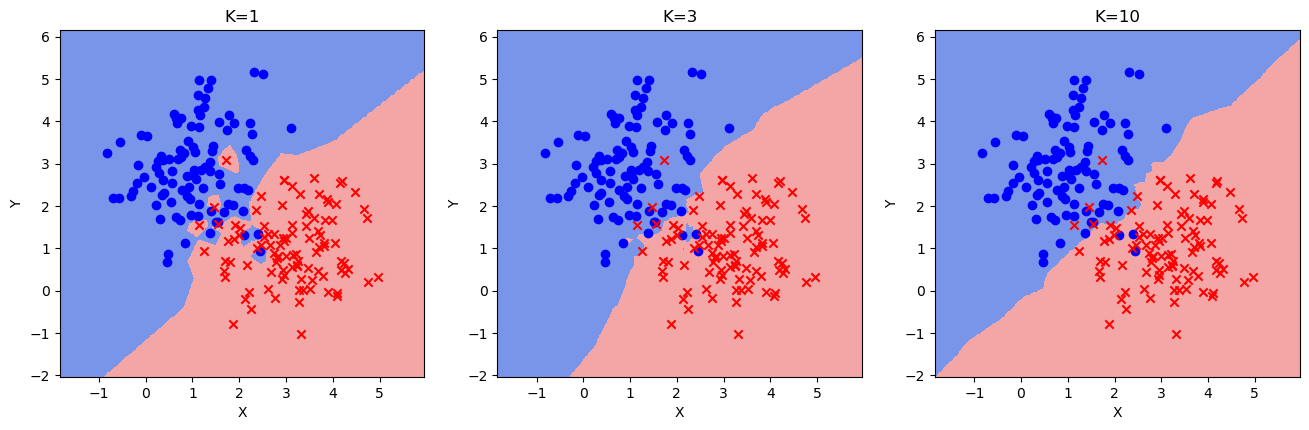

In [43]:
step= 0.02
#设置网络边界，min -1 ，max +1
# np.min(x_train[:,0]) 取出第一列中最小值
x_min,x_max=np.min(x_train[:,0])-1,np.max(x_train[:,0])+1
# print(np.min(x_train[:,0]),np.max(x_train[:,0]))
# print(x_min,x_max)
y_min,y_max=np.min(x_train[:,1])-1,np.max(x_train[:,1])+1
# print(y_min,y_max)
# meshgrid 从坐标向量返回报表矩阵list ，coordinate 坐标，vector 向量，
# print(np.arange(x_min,x_max,step))
xx,yy= np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
# print(xx,yy)
#np.concatenate  Join a sequence of arrays along an existing  ，axis . a sequence of 一系列，很多 ，axis 轴
# xx.reshape(-1,1) 将矩阵转为N*M 行 1 列
# print(xx.reshape(-1,1))
# 沿着纵轴 将两个矩阵拼接，在此也就完成了图形中的网格数据组装,作为测试集合
grid_data= np.concatenate([xx.reshape(-1,1),yy.reshape(-1,1)],axis=1)
# print(grid_data)
# 齿梳化图形窗口
# 设置图形大小 :16*4.5
fig= plt.figure(figsize=(16,4.5))
ks =[1,3,10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])
for i,k in enumerate(ks):
    # 初始化knn
    knn =KNeighborsClassifier(n_neighbors=k)
    # 填充训练数据
    knn.fit(x_train,y_train)
    # 预测分类
    z=knn.predict(grid_data)
    # print(z)
    # 创建一个1行3列的子图， 每次添加i第+1
    ax= fig.add_subplot(1,3,i+1)   
    # 创建一个无规则矩形网格的伪彩色图,这里的xx,yy 用于绘制坐标网格,辅助数据对比
    ax.pcolormesh(xx,yy,z.reshape(xx.shape),cmap=cmap_light,alpha=0.7)
    ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c='b',marker='o')
    ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c='r',marker='x')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'K={k}')
plt.show()
# 整个过程随着K增大 分了结果的误差越来越大

In [44]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
from skimage import io # 图像IO
from skimage.color import rgb2lab,lab2rgb #图像通道转换
from sklearn.neighbors import KNeighborsRegressor #KNN回归器
import os
import matplotlib.pyplot as plt
import numpy as np
path ='style_transfer'

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg']


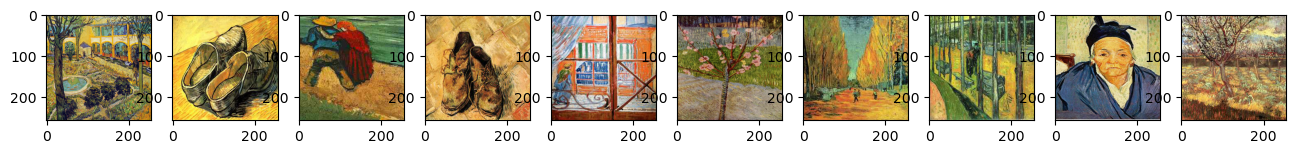

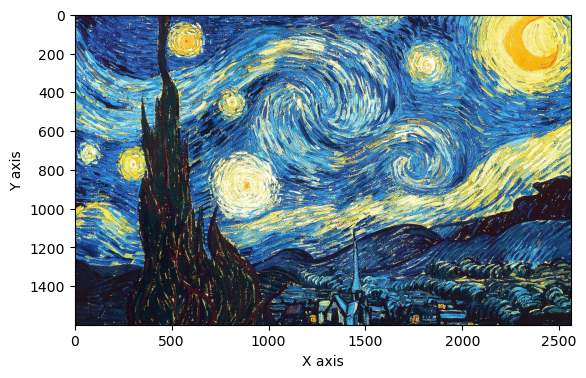

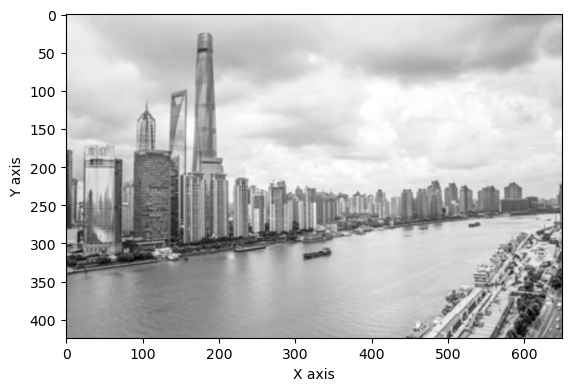

Constructing window...
Predicting...


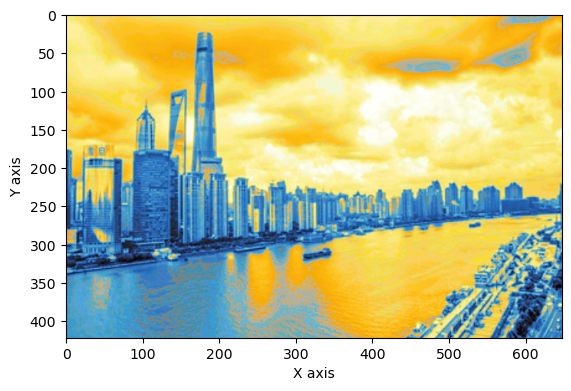

In [11]:
# 路径为 style_transfer/vangogh
data_dir=os.path.join(path,'vangogh')
fig=plt.figure(figsize=(16,5))
print(os.listdir(data_dir))
# np.sort 返回的是个数组
# 控制去除的数据量
for i,file in enumerate(np.sort(os.listdir(data_dir))[:10]):
    # 读图片
    img= io.imread(os.path.join(data_dir,file))
    ax=fig.add_subplot(1,10,i+1)
    # 填充到内存
    ax.imshow(img)
plt.show()
# block_size表示向外扩展的层数，扩展1层即3*3
block_size = 1

def read_style_image(file_name, size=block_size):
    # 读入风格图像, 得到映射 X->Y
    # 其中X储存3*3像素格的灰度值，Y储存中心像素格的色彩值
    # 读取图像文件，设图像宽为W，高为H，得到W*H*3的RGB矩阵
    img = io.imread(file_name)
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    # 将RGB矩阵转换成LAB表示法的矩阵，大小仍然是W*H*3，三维分别是L、A、B
    img = rgb2lab(img)
    # 取出图像的宽度和高度
    w, h = img.shape[:2]

    X = []
    Y = []
    # 枚举全部可能的中心点
    for x in range(size, w - size):
        for y in range(size, h - size):
            # 保存所有窗口
            X.append(img[x - size: x + size + 1, \
                y - size: y + size + 1, 0].flatten())
            # 保存窗口对应的色彩值a和b
            Y.append(img[x, y, 1:])
    return X, Y

X, Y = read_style_image(os.path.join(path, 'style.jpg')) # 建立映射

# weights='distance'表示邻居的权重与其到样本的距离成反比
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)
def rebuild(img, size=block_size):
    # 打印内容图像
    fig = plt.figure()
    plt.imshow(img)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

    # 将内容图像转为LAB表示
    img = rgb2lab(img)
    w, h = img.shape[:2]

    # 初始化输出图像对应的矩阵
    photo = np.zeros([w, h, 3])
    # 枚举内容图像的中心点，保存所有窗口
    print('Constructing window...')
    X = []
    for x in range(size, w - size):
        for y in range(size, h - size):
            # 得到中心点对应的窗口
            window = img[x - size: x + size + 1, \
                y - size: y + size + 1, 0].flatten()
            X.append(window)
    X = np.array(X)

    # 用KNN回归器预测颜色
    print('Predicting...')
    pred_ab = knn.predict(X).reshape(w - 2 * size, h - 2 * size, -1)
    # 设置输出图像
    photo[:, :, 0] = img[:, :, 0]
    photo[size: w - size, size: h - size, 1:] = pred_ab

    # 由于最外面size层无法构造窗口，简单起见，我们直接把这些像素裁剪掉
    photo = photo[size: w - size, size: h - size, :]
    return photo
content = io.imread(os.path.join(path, 'input.jpg'))
new_photo = rebuild(content)
# 为了展示图像，我们将其再转换为RGB表示
new_photo = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

reading 00001.jpg


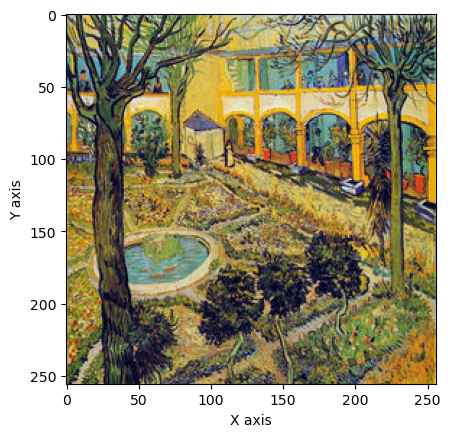

reading 00002.jpg


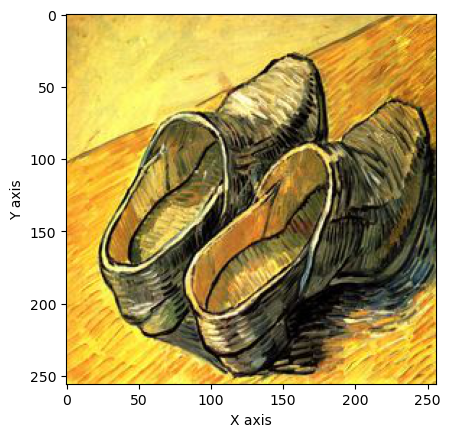

reading 00003.jpg


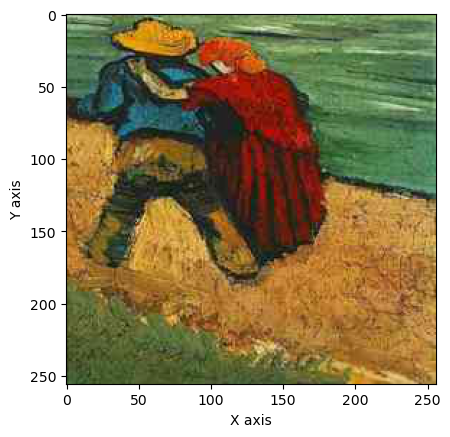

reading 00004.jpg


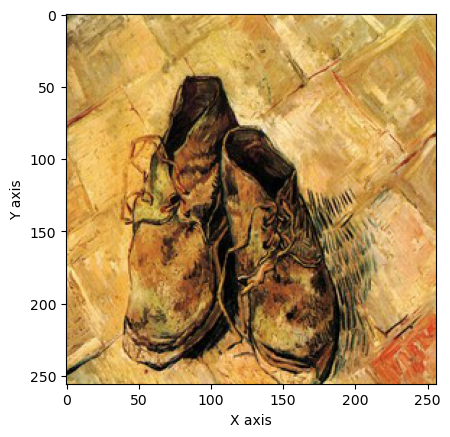

reading 00005.jpg


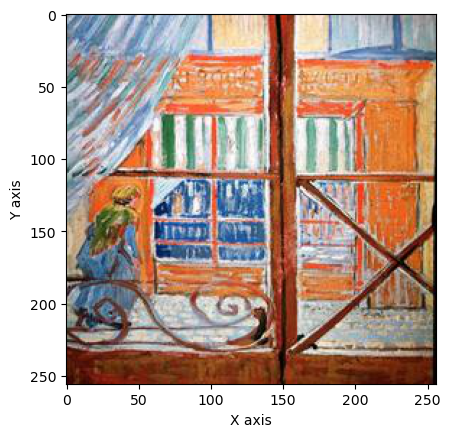

reading 00006.jpg


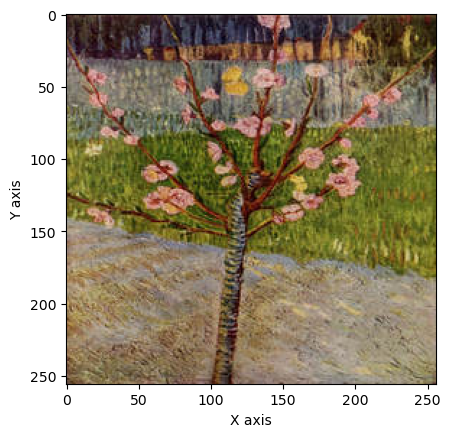

reading 00007.jpg


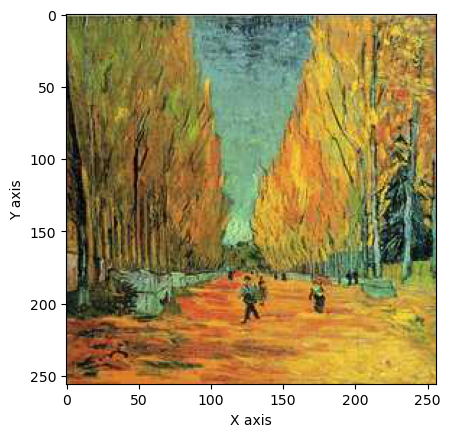

reading 00008.jpg


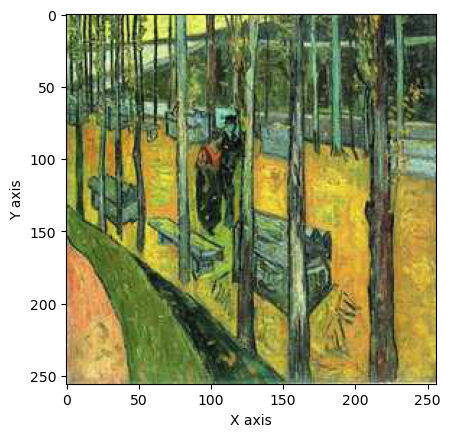

reading 00009.jpg


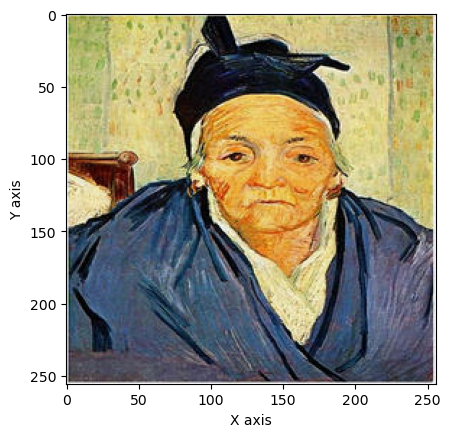

reading 00010.jpg


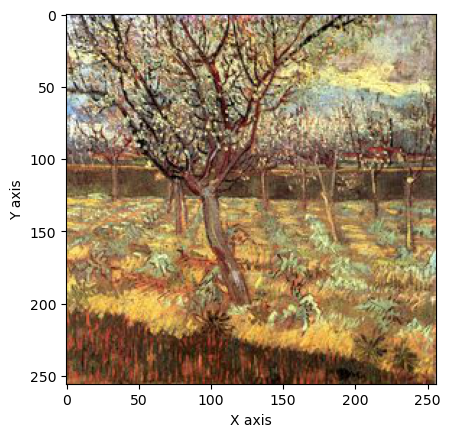

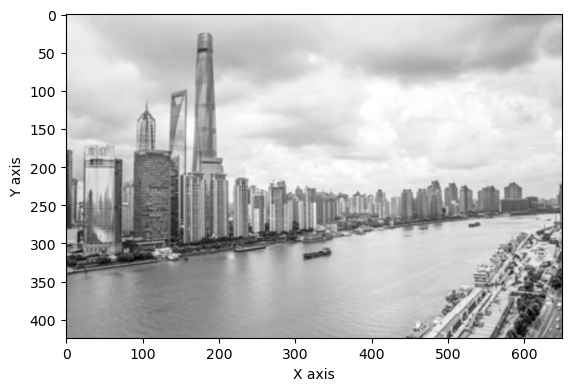

Constructing window...
Predicting...


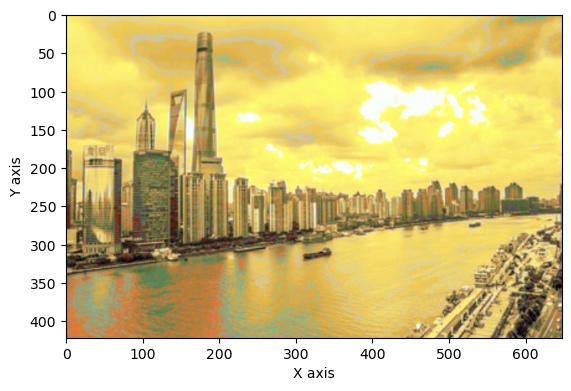

In [19]:
# 创建由多张图像构成的数据集，num表示图像数量
# 返回的X、Y的含义与函数read_style_image相同
def create_dataset(data_dir='vangogh', num=10):
    # 初始化函数输出
    X = []
    Y = []
    # 读取图像
    files = np.sort(os.listdir(os.path.join(path, data_dir)))
    num = min(num, len(files))
    for file in files[:num]:
        print('reading', file)
        X0, Y0 = read_style_image(os.path.join(path, data_dir, file))
        X.extend(X0)
        Y.extend(Y0)
    return X, Y

X, Y = create_dataset()
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(X, Y)

content = io.imread(os.path.join(path, 'input.jpg'))
new_photo = rebuild(content)
new_photo = lab2rgb(new_photo)

fig = plt.figure()
plt.imshow(new_photo)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler

lines =np.loadtxt('USA_Housing.csv',delimiter=',',dtype='str')
header = lines[0]
lines = lines[1:].astype(float)
print('数据特征：', ', '.join(header[:-1]))
print('数据标签：', header[-1])
print('数据总条数：', len(lines))

数据特征： Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
数据标签： Price
数据总条数： 5000


In [27]:
 np.random.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method